<a href="https://colab.research.google.com/github/Bborub/baseball/blob/main/Copy_of_DSC502_030723_knn_decisiontree_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying knn and decision tree on diabetes dataset
## 1) K Nearest Neighbor (knn) 

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/scsu-data-science/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# replace zeros or NaN with averages for the following columns:
# Glucose, BloodPressure, SkinThickness, BMI, Insulin

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']:
    df[col] = df[col].replace(0, np.NaN)
    mean = df[col].mean()
    df[col] = df[col].replace(np.NaN, mean)
    
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [ ]:
# Define the X columns (independent variables) and y variable (response variable - what we want to predict)

# First 8 columns
X = df.loc[:, 'Pregnancies':'Age']

# Last column
y = df.loc[:, 'Outcome']

# Generate the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0, 
                                                    test_size = 0.2)

In [ ]:
# feature scaling: standardization (Transform data so that mean = 0 and std deviation = 1)

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [ ]:
# define the model.  Neighborhood size = 11, 2 classes, Euclidean distance as distance metric
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [ ]:
# "Train" the model
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Predict the responses from the test set
y_pred = classifier.predict(X_test_scaled)

In [ ]:
# Generate confusion matrix
# 
#            Predicted
#             N     Y
# Actual N    TN    FP
#        Y    FN    TP


cm = confusion_matrix(y_test, y_pred)
print(cm)



[[94 13]
 [16 31]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8116883116883117

In [ ]:
# Predict the response for a given example (values are somewhat arbitrary here)

classifier.predict([[1, 150, 78, 29.3, 155, 23, 0.23, 40]])

array([1])

# Diabetes example using a decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Feature scaling is not needed
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[93 14]
 [23 24]]


In [ ]:
# Model accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7597402597402597

## Visualizing the tree using graphviz



In [ ]:

from sklearn.tree import export_graphviz

feature_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']

export_graphviz(
    tree_clf,
    out_file = 'diabetes_tree.dot',
    feature_names=feature_names,
    class_names=['0','1'],
    rounded = True,
    filled = True
)

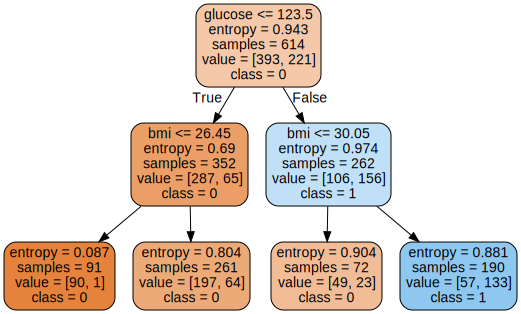

In [ ]:
import graphviz

with open('diabetes_tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Which features are most important for prediction? 

In [ ]:
feature_imp = pd.Series(data = tree_clf.feature_importances_, index = df.columns[:8])
feature_imp.sort_values(ascending = False, inplace = True)

print(feature_imp)

Glucose                     0.532441
BMI                         0.270692
Age                         0.176520
Insulin                     0.020347
Pregnancies                 0.000000
BloodPressure               0.000000
SkinThickness               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64
